In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import Thermobar as pt
import PySulfSat as ss
pd.set_option("display.max_columns", None)

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 10 # Overall title
plt.rcParams["axes.labelsize"] = 10 # Axes labels

In [3]:
Lerner=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name='Lerner2021_FilteredMI')
Lerner_Num=Lerner.apply(pd.to_numeric, errors='coerce').fillna(0)
Lerner_MG=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx',sheet_name='Lerner2021_FilteredMG')

In [4]:
# Loading 2018 melt inclusion data
All2018_MI_preS=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name="Wieser_Ol_Hosted_MI_2018")


F8_MI_with_sulf=All2018_MI_preS.loc[All2018_MI_preS['S_Sulf']>0]
MC1_all, all_outputs=ss.propagate_s_in_sulfide(sample_ID=F8_MI_with_sulf['Comment'], N_dup=1000, S_Sulf=32,
            Vol=F8_MI_with_sulf['Vol_Prop_Sulf'],
sulf_dens=4350, melt_dens=1000*F8_MI_with_sulf['Density_g_per_cm3'],
error_type_melt_dens='Abs', error_dist_melt_dens='normal', error_melt_dens=1000*All2018_MI_preS['Uncertainty_g_per_cm3'],
error_S_Sulf=3, error_type_S_Sulf='Abs', error_dist_S_Sulf='uniform',
error_Vol=50, error_type_Vol='Perc', error_dist_Vol='normal',
error_sulf_dens=150, error_type_sulf_dens='Abs', error_dist_sulf_dens='uniform',                       
plot_figure=True, len_loop=1)
MC1_all.head()
MC1_all['Comment']=MC1_all['Filename']
All2018_MI=pd.merge(All2018_MI_preS, MC1_all, on='Comment', how='left')
All2018_MI.head()


JustF8_MI=(All2018_MI['Sample number']=="LL4")|(All2018_MI['Sample number']=="LL7")|(All2018_MI['Sample number']=="LL8")
F8_MI=All2018_MI.loc[JustF8_MI].reset_index(drop=True)
LL4_MI=F8_MI['Sample number']=="LL4"
LL7_MI=F8_MI['Sample number']=="LL7"
LL8_MI=F8_MI['Sample number']=="LL8"

F8_MI_with_sulf=F8_MI.loc[F8_MI['ind_s_eq_melt']>0]

# Loading 2018 matrix glass
All2018_MG=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name="Wieser_MatrixGlass_2018")
JustF8_MG=(All2018_MG['Sample number']=="LL4")|(All2018_MG['Sample number']=="LL7")|(All2018_MG['Sample number']=="LL8")
F8_MG=All2018_MG.loc[JustF8_MG]

grad=130
inter=-415

S_Degass_Lim=grad*F8_MI['FeO_MI EPMA']+inter
Degass=F8_MI['S_MI EPMA (ppm)']<S_Degass_Lim
Undegass=(F8_MI['S_MI EPMA (ppm)']>=S_Degass_Lim)
Degassed_Wieser=F8_MI.loc[F8_MI['S_MI EPMA (ppm)']<S_Degass_Lim]
Undegassed_Wieser=F8_MI.loc[(F8_MI['S_MI EPMA (ppm)']>=S_Degass_Lim)]

Has_Sulf_Wieser=F8_MI['ind_s_eq_melt']>0


# Preferred value
Undegassed_Wieser['S_Sulf_Restored_PEC']=(Undegassed_Wieser['S_MI EPMA (ppm)']+Undegassed_Wieser['ind_s_eq_melt'])/(1+Undegassed_Wieser['Amount  PEC (%)']/100)
Undegassed_Wieser['S_Sulf_Restored_PEC_Upper']=(Undegassed_Wieser['S_MI EPMA (ppm)']+Undegassed_Wieser['mean_S_eq_melt']+Undegassed_Wieser['std_S_eq_melt'])/(1+Undegassed_Wieser['Amount  PEC (%)']/100)
Undegassed_Wieser['S_Sulf_Restored_PEC_Lower']=(Undegassed_Wieser['S_MI EPMA (ppm)']+Undegassed_Wieser['mean_S_eq_melt']-Undegassed_Wieser['std_S_eq_melt'])/(1+Undegassed_Wieser['Amount  PEC (%)']/100)

Undegassed_Wieser['S_Sulf_Error_up']=Undegassed_Wieser['std_S_eq_melt']
Undegassed_Wieser['S_Sulf_Error_lower']=Undegassed_Wieser['std_S_eq_melt']

# GEt rid of coentrapped
Undegassed_Wieser['S_Sulf_Restored_PEC'].loc[Undegassed_Wieser['S_Sulf_Restored_PEC']>1600]=np.nan

working on sample number 0
working on sample number 20


C:\Users\penny\AppData\Local\Temp\ipykernel_8236\2531789349.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Wieser['S_Sulf_Restored_PEC']=(Undegassed_Wieser['S_MI EPMA (ppm)']+Undegassed_Wieser['ind_s_eq_melt'])/(1+Undegassed_Wieser['Amount  PEC (%)']/100)
C:\Users\penny\AppData\Local\Temp\ipykernel_8236\2531789349.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Wieser['S_Sulf_Restored_PEC_Upper']=(Undegassed_Wieser['S_MI EPMA (ppm)']+Undegassed_Wieser['mean_S_eq_melt']+Undeg

In [5]:
Dixon=pd.read_excel(r'../Spreadsheets/Dixon1991_Data.xlsx', sheet_name='Dixon_T')

In [6]:
Lerner.head()

,Analysis Name,Fe3FeT_Thesis,S6ST_Thesis,Fissure\n#,Sample\nName,Eruption\nDate,Days since eruption start,Distance traveled before quench (km),Glass Type,Host mineral,Melt inclusion length,Melt inclusion width,vapor bubble volume (%),Sulfide diameter if present in MI,Sulfide Diameter,Chance_for_Obs,Host \nAn#,Host \nMg#,"Fo equilibrium olivine (assume Kd=0.32, xFeO / ΣxFe =0.82)",SiO2 wt%_PEC,SiO2 (1SE),TiO2 wt%_PEC,TiO2 (1SE),Al2O3 wt%_PEC,Al2O3 (1SE),FeOT wt%_PEC,FeOT (1SE),MgO wt%_PEC,MgO (1SE),MnO wt%_PEC,MnO (1SE),CaO wt%_PEC,CaO (1SE),Na2O wt%_PEC,Na2O (1SE),K2O wt%_PEC,K2O (1SE),P2O5 wt%_PEC,P2O5 (1SE),Cl ppm_PEC,Cl\n(1SE),"S ppm (with sulfide restored, if applicable)_PEC",S (1SE) from glass EPMA analysis,S (1σ) from sulfide restoration (±1 μm sulfide diameter),non-sulfide corrected S ppm,Sulf_Err,F ppm (not measured for all),F\n(1SE),un-normalized total wt%,S/Cl (mass ratio),F8 matrix glass S (ppm) restored from basaltic pumice S/Cl mass ratio of 7.0,H2O in melt (wt%) (FTIR),H2O in melt (1σ) (FTIR),"CO2 in melt (ppm) (FTIR) Note: detection limit is ~30 ppm. Due to use of white light or measurements through crystal hosts, CO2 was not measured in some FTIR measurements where H2O was resolved",CO2 in melt + bubble (ppm) (Raman + FTIR; assume 30 ppm CO2 if bdl by FTIR),CO2 in melt + bubble (1σ) (Raman + FTIR),Saturation pressure (MPa) (via Iacono-Marziano 2012) Assumes 30 ppm CO2 if bdl in glass FTIR,Saturation pressure (1σ) (MPa),Saturation depth (km) (Ryan 1987 parameterization),Saturation depth (1σ) (km),melt \nMg#,Temperature of matrix glass quenching or MI entrapment (°C) (Helz and Thornber 1987),Entrapment Temperature - Quench Temperature (°C),PEC correction coefficient,% Incompatible enrichment due to PEC,%Enrich_Decimal,Unnamed: 66,δ34S,δ34S_1SE,34S/32S ratio raw measured,34S/32S ratio (1SE) raw measured,34S/32S ratio scaled to instrument mass fractionation (α=1.0041),34S/32S ratio (1SE) scaled to instrument mass fractionation (α=1.0041),"Melt density (1atm, Melt Temp, non-PEC-corrected composition; DensityX calcs)","Melt density (1atm, 25°C, non-PEC-corrected composition; DensityX calcs)",SiO2 wt%_Raw,TiO2 wt%_Raw,Al2O3 wt%_Raw,FeOT wt%_Raw,MgO wt%_Raw,MnO wt%_Raw,CaO wt%_Raw,Na2O wt%_Raw,K2O wt%_Raw,P2O5 wt%_Raw,Cl ppm_Raw,"S ppm (with sulfide restored, if applicable)_Raw",non0sulfide corrected S ppm,S_Raw_Glass_Meas,S_PEC_Glass_Meas,S_Sulf,F ppm (not measured for all).1,un-normalized total wt%.1,1 = July 2018; 2= Nov 2018; 3 = Nov 2019; 4 = Jan 2020,Cl Ratio,S Ratio,PEC_Equivalent
0,"KE62-3293S_1_G01_53, 54 avg",NaN,NaN,8.0,KE62-3293S,2018-05-30,27.0,0.02,melt inclusion,Olivine,not quantified,not quantified,not quantified,no evidence preserved (grain mount),NaN,No,NaN,87.824111,87.300492,49.885022,0.490929,1.914854,0.040386,11.801659,0.030286,11.542800,0.150336,12.125232,0.022401,0.121904,0.016516,10.051351,0.077747,1.836594,0.039517,0.381767,0.014589,0.240297,0.029897,104.944254,14.549314,696.607378,36.255453,NaN,NaN,NaN,183.655452,102.299576,98.130770,6.637880,734.609780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.191237,1140.336934,117.380234,0.786,0.272265,0.272265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.625699,2.863693,52.43735,2.353980,14.73470,6.423010,6.499365,0.108718,12.4697,2.29132,0.478299,0.298336,130.875,868.732560,0.0,868.732560,696.607378,0.0,229.035,98.34765,1.0,0.801866,0.801866,24.709067
1,"KE62-3293S_1_G01_55, 56 avg",NaN,NaN,8.0,KE62-3293S,2018-05-30,27.0,0.02,melt inclusion,Olivine,not quantified,not quantified,not quantified,no evidence preserved (grain mount),NaN,No,NaN,87.824111,87.334489,50.105992,0.490852,1.798566,0.039590,11.723540,0.030107,11.544436,0.150998,12.112853,0.022453,0.121409,0.016125,9.935509,0.077121,2.012788,0.041033,0.294995,0.013748,0.255361,0.027886,99.901636,14.346874,642.188030,35.517044,NaN,NaN,NaN,203.418356,101.455719,98.436132,6.428203,699.311450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.164836,1140.336934,117.131407,0.7845,0.274697,0.274697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.620668,2

In [7]:
FeO_Lin=np.linspace(6, 13, 50)

S_Degass_Lin=grad*FeO_Lin+inter
S_Degass_Lim=grad*Lerner['FeOT wt%_Raw']+inter
Degass=Lerner['S_Raw_Glass_Meas']<S_Degass_Lim
Undegass=(Lerner['S_Raw_Glass_Meas']>=S_Degass_Lim)
Degassed_Lerner=Lerner.loc[Lerner['S_Raw_Glass_Meas']<S_Degass_Lim]
Undegassed_Lerner=Lerner.loc[(Lerner['S_Raw_Glass_Meas']>=S_Degass_Lim)].apply(pd.to_numeric,errors='coerce')

Undegassed_Lerner['PEC correction coefficient'] = Undegassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')
Degassed_Lerner['PEC correction coefficient'] = Degassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')
Lerner['PEC correction coefficient'] = Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')

Has_Sulf_Undegass=Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_Raw']>Undegassed_Lerner['S_Raw_Glass_Meas']

Has_Sulf_Wieser_Undegassed=Undegassed_Wieser['S_Sulf']>0
ms_big=5

C:\Users\penny\AppData\Local\Temp\ipykernel_8236\363851725.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Degassed_Lerner['PEC correction coefficient'] = Degassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')


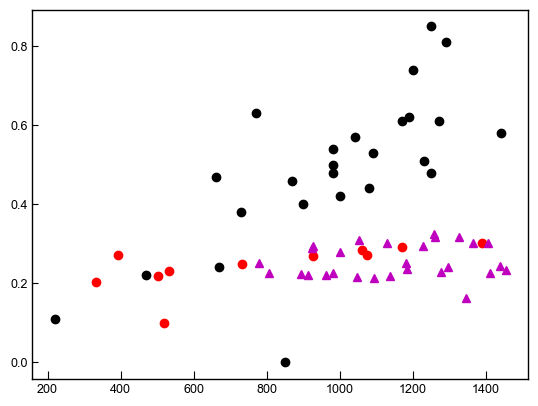

In [8]:
plt.plot(Dixon['S_ppm'], Dixon['H2O'], 'ok')
plt.plot(Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'], Undegassed_Lerner['H2O in melt (wt%) (FTIR)'], 'or')
plt.plot(Undegassed_Wieser['S_Sulf_Restored_PEC'], Undegassed_Wieser['H2O_MI SIMS'], '^m')

In [9]:
Undegassed_Wieser.columns[Undegassed_Wieser.columns.str.contains('CO2')]

Index(['CO2_MI (SIMS+ Raman)', 'CO2'], dtype='object')

In [10]:
Undegassed_Lerner.columns[Undegassed_Lerner.columns.str.contains('CO2')]

Index(['CO2 in melt (ppm) (FTIR)  Note: detection limit is ~30 ppm. Due to use of white light or measurements through crystal hosts, CO2 was not measured in some FTIR measurements where H2O was resolved',
       'CO2 in melt + bubble (ppm) (Raman + FTIR; assume 30 ppm CO2 if bdl by FTIR)',
       'CO2 in melt + bubble (1σ) (Raman + FTIR)',
       'Saturation pressure (MPa) (via Iacono-Marziano 2012) Assumes 30 ppm CO2 if bdl in glass FTIR'],
      dtype='object')

(array([6., 0., 5., 1., 3., 1., 0., 0., 0., 1.]),
 array([0.077 , 0.2494, 0.4218, 0.5942, 0.7666, 0.939 , 1.1114, 1.2838,
        1.4562, 1.6286, 1.801 ]),
 <BarContainer object of 10 artists>)

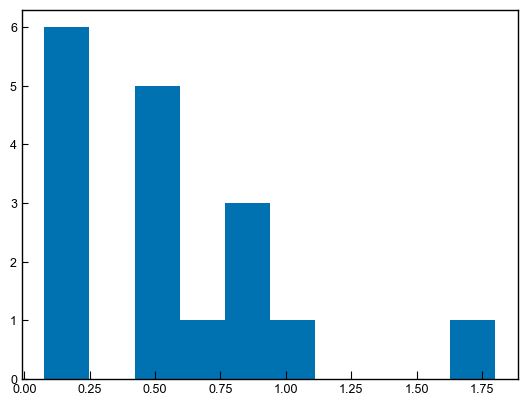

In [45]:
plt.hist(Undegassed_Lerner['Saturation pressure (MPa) (via Iacono-Marziano 2012) Assumes 30 ppm CO2 if bdl in glass FTIR']/100)

Text(0, 0.5, 'CO2')

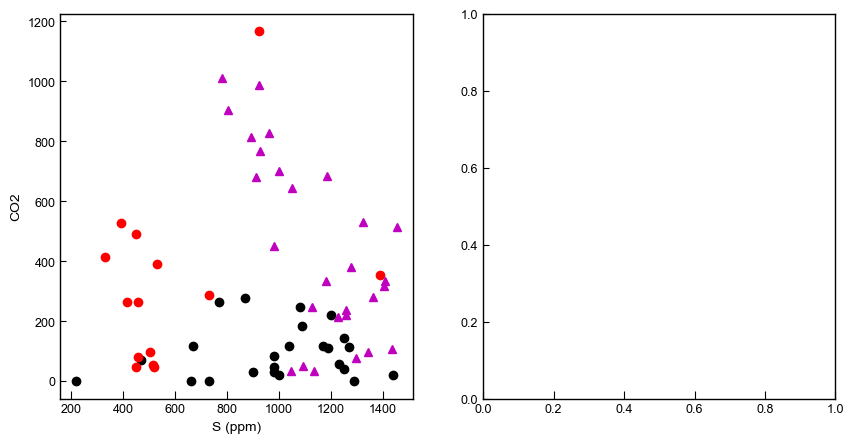

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Dixon['S_ppm'], Dixon['CO2'], 'ok')
ax1.plot(Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'], Undegassed_Lerner['CO2 in melt + bubble (ppm) (Raman + FTIR; assume 30 ppm CO2 if bdl by FTIR)'], 'or')
ax1.plot(Undegassed_Wieser['S_Sulf_Restored_PEC'], Undegassed_Wieser['CO2_MI (SIMS+ Raman)'], '^m')
ax1.set_xlabel('S (ppm)')
ax1.set_ylabel('CO2')

In [42]:
np.nanmedian(Dixon['CO2'])

77.5

In [43]:
np.nanmedian( Undegassed_Wieser['CO2_MI (SIMS+ Raman)'])

340.528128129102

Text(0, 0.5, 'S (ppm)')

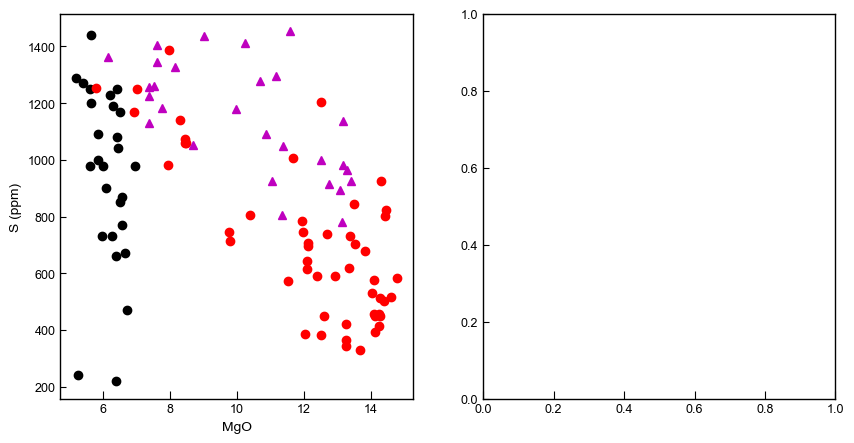

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot( Dixon['MgO'], Dixon['S_ppm'], 'ok')
ax1.plot( Undegassed_Lerner['MgO wt%_PEC'], Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'], 'or')
ax1.plot( Undegassed_Wieser['MgO_MI_PEC EPMA'], Undegassed_Wieser['S_Sulf_Restored_PEC'], '^m')
ax1.set_xlabel('MgO')
ax1.set_ylabel('S (ppm)')

## SCSS of Dixons glasses

In [32]:
Dixon_pref = Dixon.add_suffix('_Liq')
Dixon_pref['FeOt_Liq']=Dixon_pref['FeO_Liq']
Dixon_pref['T_K']= 21.2*Dixon_pref['MgO_Liq']+1017+273.15
SCSS_Raw_ONeill_015Fe3=ss.calculate_O2021_SCSS(df=Dixon_pref, T_K=Dixon_pref['T_K'], P_kbar=1,    
                            Fe_FeNiCu_Sulf=0.646, Fe3Fet_Liq=0.15)
SCSS_Raw_ONeill_015Fe3.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,Location_Liq,Flow_Liq,Number_Liq,Depth_Liq,SiO2_Liq,Al2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K20_Liq,P2O5_Liq,TiO2_Liq,Total_Liq,S(wt~)_Liq,H2O_Liq,CO2_Liq,Unnamed: 18_Liq,S_ppm_Liq,FeOt_Liq,T_K,Fe3Fet_Liq,Fe_FeNiCu_Sulf_calc
0,1072.528584,6.977774,-2.337005,-0.514133,8.010960,-2.856058,Puna Ridge,1684,1,490,51.2,14.2,11.0,0.15,6.37,10.9,2.48,0.52,0,2.70,99.9,0.066,0.47,0.0,NaN,660.0,11.0,1425.194,0.15,0.646
1,1056.406960,6.962629,-2.328621,-0.517033,8.072919,-2.921878,Puna Ridge,1717,2,550,51.8,13.6,11.3,0.16,5.98,10.2,2.56,0.54,0,2.87,99.5,0.073,0.38,0.0,NaN,730.0,11.3,1416.926,0.15,0.646
2,1067.289682,6.972878,-2.296179,-0.516286,8.069723,-2.876738,Puna Ridge,D4Sa,2,740,50.7,14.1,11.2,0.17,6.00,10.6,2.69,0.49,0,2.72,99.0,0.098,0.50,30.0,NaN,980.0,11.2,1417.350,0.15,0.646
3,1061.392503,6.967337,-2.301949,-0.518220,8.092136,-2.908527,Puna Ridge,D4Sb,5,740,51.0,13.8,11.4,0.17,5.86,10.0,2.67,0.58,0,3.00,98.9,0.100,0.42,19.0,NaN,1000.0,11.4,1414.382,0.15,0.646
4,1126.335345,7.026725,-2.286873,-0.519310,8.058553,-2.799392,Puna Ridge,1685,2,890,50.7,13.6,11.6,0.18,6.07,10.3,2.71,0.67,0,3.17,99.5,0.090,0.40,29.0,NaN,900.0,11.6,1418.834,0.15,0.646


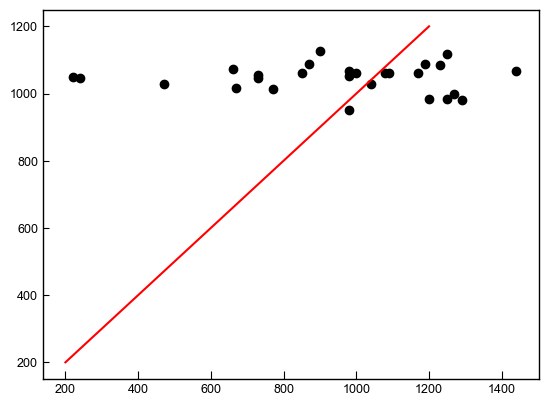

In [34]:
plt.plot( Dixon['S_ppm'], SCSS_Raw_ONeill_015Fe3['SCSS2_ppm'], 'ok')
plt.plot([200, 1200], [200, 1200], '-r')

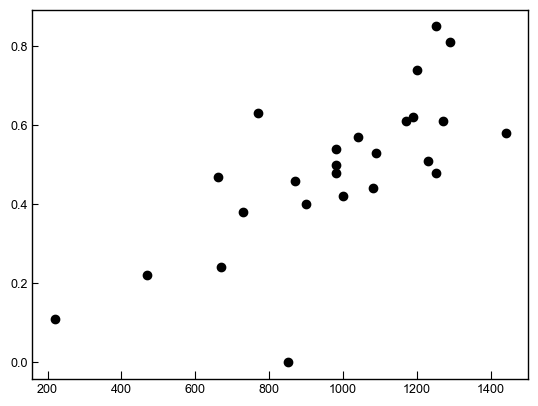

In [47]:
plt.plot( Dixon['S_ppm'], Dixon['H2O'], 'ok')


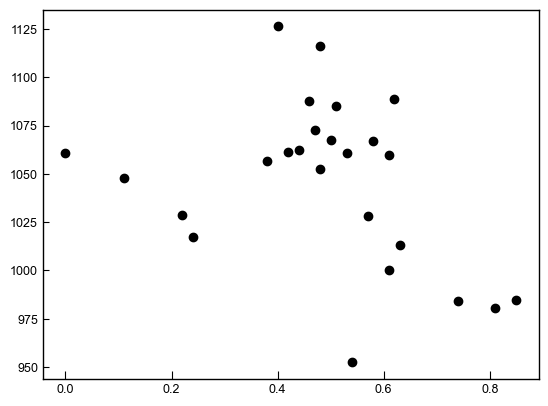

In [36]:
plt.plot( Dixon['H2O'], SCSS_Raw_ONeill_015Fe3['SCSS2_ppm'], 'ok')


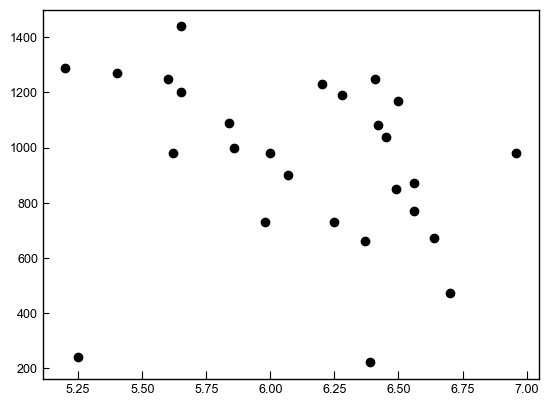

In [37]:
plt.plot( Dixon['MgO'], Dixon['S_ppm'], 'ok')

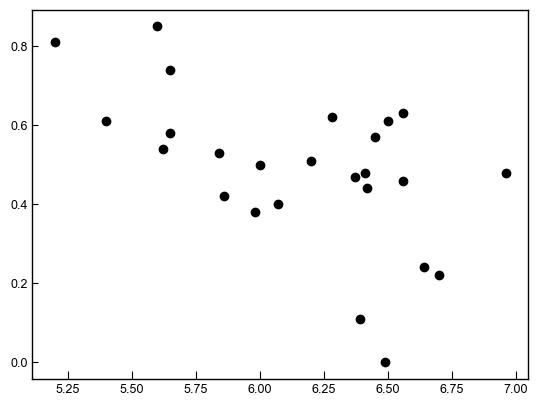

In [38]:
plt.plot( Dixon['MgO'], Dixon['H2O'], 'ok')

In [22]:
Ulu_MG=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name="Wieser_MG_1969_1794")
Ulu_MG.head()

,Batch/Run,Spot size (um),Eruption,Date,Glass Fragment ID,Ablation Duration(s),Cu_ppm_m65,Cu_ppm_m65_Int2SE,Zn_ppm_m66,Zn_ppm_m66_Int2SE,Mo_ppm_m95,Mo_ppm_m95_Int2SE,Cd_ppm_m111,Cd_ppm_m111_Int2SE,In_ppm_m115,In_ppm_m115_Int2SE,Sn_ppm_m118,Sn_ppm_m118_Int2SE,Sb_ppm_m121,Sb_ppm_m121_Int2SE,W_ppm_m182,W_ppm_m182_Int2SE,Tl_ppm_m205,Tl_ppm_m205_Int2SE,Bi_ppm_m209,Bi_ppm_m209_Int2SE,Duration (s),As_91_ppm_m75,As_91_ppm_m75_Int2SE,Se_96_ppm_m80,Se_96_ppm_m80_Int2SE,Unnamed: 31,Na2O,Al2O3,P2O5,CaO,K2O,TiO2,SiO2,MgO,FeO,MnO,MnO corrected,SO2,Cl,Cl (corrected,Total,Mg Number,Li_ppm_m7,Li_ppm_m7_Int2SE,Be_ppm_m9,Be_ppm_m9_Int2SE,P_ppm_m31 (Si reduced to BCR),P_ppm_m31_Int2SE,Sc_ppm_m45,Sc_ppm_m45_Int2SE,V_ppm_m51,V_ppm_m51_Int2SE,Cr_ppm_m53,Cr_ppm_m53_Int2SE,Co_ppm_m59,Co_ppm_m59_Int2SE,Ni_ppm_m60,Ni_ppm_m60_Int2SE,Rb_ppm_m85,Rb_ppm_m85_Int2SE,Sr_ppm_m88,Sr_ppm_m88_Int2SE,Y_ppm_m89,Y_ppm_m89_Int2SE,Zr_ppm_m90,Zr_ppm_m90_Int2SE,Nb_ppm_m93,Nb_ppm_m93_Int2SE,Cs_ppm_m133,Cs_ppm_m133_Int2SE,Ba_ppm_m137,Ba_ppm_m137_Int2SE,La_ppm_m139,La_ppm_m139_Int2SE,Ce_ppm_m140,Ce_ppm_m140_Int2SE,Pr_ppm_m141,Pr_ppm_m141_Int2SE,Nd_ppm_m146,Nd_ppm_m146_Int2SE,Sm_ppm_m147,Sm_ppm_m147_Int2SE,Eu_ppm_m153,Eu_ppm_m153_Int2SE,Gd_ppm_m157,Gd_ppm_m157_Int2SE,Tb_ppm_m159,Tb_ppm_m159_Int2SE,Dy_ppm_m163,Dy_ppm_m163_Int2SE,Ho_ppm_m165,Ho_ppm_m165_Int2SE,Er_ppm_m166,Er_ppm_m166_Int2SE,Tm_ppm_m169,Tm_ppm_m169_Int2SE,Yb_ppm_m172,Yb_ppm_m172_Int2SE,Lu_ppm_m175,Lu_ppm_m175_Int2SE,Hf_ppm_m177,Hf_ppm_m177_Int2SE,Ta_ppm_m181,Ta_ppm_m181_Int2SE,Pb_ppm_m208,Pb_ppm_m208_Int2SE,Th_ppm_m232,Th_ppm_m232_Int2SE,U_ppm_m238,U_ppm_m238_Int2SE
0,Batch 2,110,916,1974,MI_Glass_916_G1c,21.964,122.8,3.3,120.8,4.6,0.671,0.069,0.099,0.043,0.097,0.012,1.554,0.071,0.039,0.011,0.169,0.019,0.0188,0.0034,0.0111,0.0025,5.9668,0.424,0.018,0.167,0.019,NaN,2.369333,13.293333,0.235000,11.022033,0.564167,2.766433,49.812033,6.428500,11.282567,0.356800,0.223000,0.038033,0.016267,0.014145,98.184533,0.544392,4.16,0.27,0.80,0.25,1339,43,29.14,0.73,290.0,9.1,168.0,5.3,41.0,1.5,76.4,2.0,9.08,0.34,353.0,10.0,23.41,0.76,149.7,3.2,15.07,0.50,0.0846,0.0073,120.8,4.0,13.35,0.48,31.47,0.89,4.56,0.15,22.68,0.81,5.74,0.30,1.930,0.098,5.53,0.30,0.831,0.032,4.61,0.20,0.902,0.043,2.23,0.15,0.277,0.018,1.94,0.15,0.266,0.025,4.03,0.32,0.933,0.061,1.103,0.097,1.061,0.069,0.335,0.031
1,Batch 2,110,916,1974,MI_Glass_916_G2c,20.663,135.3,3.4,121.1,5.3,0.676,0.087,0.144,0.047,0.093,0.014,1.533,0.079,0.044,0.011,0.175,0.021,0.0231,0.0035,0.0095,0.0020,6.3942,0.419,0.016,0.138,0.014,NaN,2.407633,13.294033,0.309433,11.054233,0.580000,2.753933,50.198067,6.377000,11.141700,0.338567,0.211604,0.024700,0.016433,0.014290,98.495667,0.545513,4.51,0.26,1.02,0.31,1311,42,30.60,1.10,305.0,12.0,263.0,32.0,42.0,1.5,81.5,3.3,9.26,0.31,344.6,8.6,23.34,0.71,147.1,4.1,14.60,0.43,0.0945,0.0080,119.9,4.3,13.42,0.41,31.50,1.10,4.55,0.12,21.51,0.77,5.62,0.32,1.940,0.093,5.74,0.38,0.850,0.057,4.80,0.25,0.925,0.045,2.34,0.13,0.300,0.033,1.96,0.16,0.265,0.028,4.14,0.28,0.912,0.058,1.053,0.081,1.053,0.046,0.308,0.028
2,Batch 2,110,916,1974,MI_Glass_916_G3c,21.129,143.2,4.2,129.2,3.8,0.821,0.092,0.195,0.065,0.096,0.012,1.628,0.081,0.050,0.011,0.168,0.020,0.0237,0.0041,0.0185,0.0036,6.7130,0.444,0.019,0.145,0.020,NaN,2.386867,13.315767,0.283033,10.909000,0.556367,2.822700,50.117867,6.240033,11.373200,0.362633,0.226646,0.018933,0.016300,0.014174,98.402633,0.535013,4.40,0.32,0.93,0.30,1353,41,28.79,0.87,306.0,11.0,122.6,5.7,42.1,2.0,71.3,3.6,9.88,0.40,366.0,12.0,24.16,0.92,157.0,5.9,15.90,0.70,0.0960,0.0066,125.8,5.9,14.05,0.55,33.70,1.60,4.57,0.18,23.61,0.88,5.84,0.31,1.990,0.100,5.81,0.40,0.878,0.056,4.79,0.27,0.953,0.069,2.52,0.16,0.312,0.028,2.03,0.16,0.288,0.024,3.85,0.33,0.961,0.065,1.200,0.120,1.067,0.067,0.374,0.027
3,Batch 2,110,916,1974,MI_Glass_916_G4c,16.175,152.0,5.6,132.5,4.8,0.900,0.100,0.153,0.070,0.092,0.011,1.664,0.085,0.043,0.013,0.189,0.023,0.0188,0.0033,0.0138,0.0025,NaN,NaN,NaN,NaN,NaN,NaN,2.377233,13.029367,0.294833,10.711500,0.620767,2.9

In [23]:
Ulu_MG.columns[Ulu_MG.columns.str.contains('MgO')]

Index(['MgO'], dtype='object')

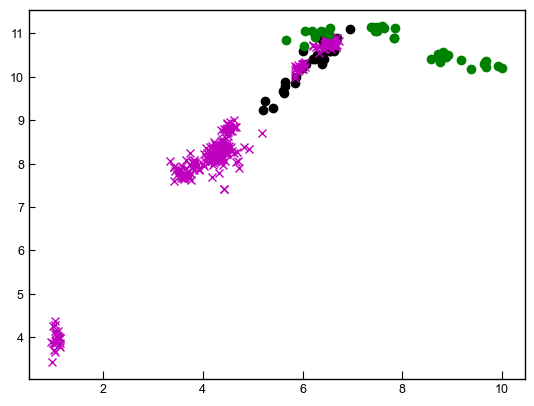

In [24]:
plt.plot( Dixon['MgO'], Dixon['CaO'], 'ok')
plt.plot(All2018_MG['MgO EPMA'], All2018_MG['CaO EPMA'], 'xm')
plt.plot(Ulu_MG['MgO'], Ulu_MG['CaO'], 'og')

,Sample number,EPMA data (------->),Na2O EPMA,Al2O3 EPMA,P2O5 EPMA,CaO EPMA,K2O EPMA,TiO2 EPMA,SiO2 EPMA,MgO EPMA,FeO EPMA,MnO EPMA,SO2 EPMA,Cl EPMA,Total,SIMS data (------->),H2O_SIMS_wt%,CO2_SIMS_ppm,F_SIMS,LAICPMS data (------->),Laser Batch (year_DayofOct_batch),Spot Size,Reduced to (Si or Ca),Duration(s),Li_ppm_m7 LAICPMS,Li_ppm_m7_Int2SE,Be_ppm_m9 LAICPMS,Be_ppm_m9_Int2SE,Na_ppm_m23 LAICPMS,Na_ppm_m23_Int2SE,K_ppm_m39 LAICPMS,K_ppm_m39_Int2SE,Sc_ppm_m45 LAICPMS,Sc_ppm_m45_Int2SE,Ti_ppm_m49 LAICPMS,Ti_ppm_m49_Int2SE,V_ppm_m51 LAICPMS,V_ppm_m51_Int2SE,Cr_ppm_m53 LAICPMS,Cr_ppm_m53_Int2SE,Mn_ppm_m55 LAICPMS,Mn_ppm_m55_Int2SE,Fe_ppm_m56 LAICPMS,Fe_ppm_m56_Int2SE,Co_ppm_m59 LAICPMS,Co_ppm_m59_Int2SE,Ni_ppm_m60 LAICPMS,Ni_ppm_m60_Int2SE,Cu_ppm_m65 LAICPMS,Cu_ppm_m65_Int2SE,Zn_ppm_m66 LAICPMS,Zn_ppm_m66_Int2SE,Ga_ppm_m71 LAICPMS,Ga_ppm_m71_Int2SE,Ge_ppm_m74 LAICPMS,Ge_ppm_m74_Int2SE,Rb_ppm_m85 LAICPMS,Rb_ppm_m85_Int2SE,Sr_ppm_m88 LAICPMS,Sr_ppm_m88_Int2SE,Y_ppm_m89 LAICPMS,Y_ppm_m89_Int2SE,Zr_ppm_m90 LAICPMS,Zr_ppm_m90_Int2SE,Nb_ppm_m93 LAICPMS,Nb_ppm_m93_Int2SE,Mo_ppm_m95 LAICPMS,Mo_ppm_m95_Int2SE,Cd_ppm_m111 LAICPMS,Cd_ppm_m111_Int2SE,In_ppm_m115 LAICPMS,In_ppm_m115_Int2SE,Sn_ppm_m118 LAICPMS,Sn_ppm_m118_Int2SE,Sb_ppm_m121 LAICPMS,Sb_ppm_m121_Int2SE,Cs_ppm_m133 LAICPMS,Cs_ppm_m133_Int2SE,Ba_ppm_m137 LAICPMS,Ba_ppm_m137_Int2SE,La_ppm_m139 LAICPMS,La_ppm_m139_Int2SE,Ce_ppm_m140 LAICPMS,Ce_ppm_m140_Int2SE,Pr_ppm_m141 LAICPMS,Pr_ppm_m141_Int2SE,Nd_ppm_m146 LAICPMS,Nd_ppm_m146_Int2SE,Sm_ppm_m147 LAICPMS,Sm_ppm_m147_Int2SE,Eu_ppm_m153 LAICPMS,Eu_ppm_m153_Int2SE,Gd_ppm_m157 LAICPMS,Gd_ppm_m157_Int2SE,Tb_ppm_m159 LAICPMS,Tb_ppm_m159_Int2SE,Dy_ppm_m163 LAICPMS,Dy_ppm_m163_Int2SE,Ho_ppm_m165 LAICPMS,Ho_ppm_m165_Int2SE,Er_ppm_m166 LAICPMS,Er_ppm_m166_Int2SE,Tm_ppm_m169 LAICPMS,Tm_ppm_m169_Int2SE,Yb_ppm_m172 LAICPMS,Yb_ppm_m172_Int2SE,Lu_ppm_m175 LAICPMS,Lu_ppm_m175_Int2SE,Hf_ppm_m177 LAICPMS,Hf_ppm_m177_Int2SE,Ta_ppm_m181 LAICPMS,Ta_ppm_m181_Int2SE,W_ppm_m182 LAICPMS,W_ppm_m182_Int2SE,Tl_ppm_m205 LAICPMS,Tl_ppm_m205_Int2SE,Pb_ppm_m208 LAICPMS,Pb_ppm_m208_Int2SE,Bi_ppm_m209 LAICPMS,Bi_ppm_m209_Int2SE,Th_ppm_m232 LAICPMS,Th_ppm_m232_Int2SE,U_ppm_m238 LAICPMS,U_ppm_m238_Int2SE
0,LL4,NaN,2.51200,13.03600,0.26890,10.24710,0.52340,2.87730,50.62430,5.84710,11.82880,0.18300,0.0449,0.0077,98.00030,NaN,0.095353,28.519259,287.032169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LL4,NaN,2.46810,12.88850,0.26520,9.96580,0.53050,2.88400,50.09750,5.85210,11.28970,0.17690,0.0386,0.0069,96.46370,NaN,0.080110,18.533598,288.245926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LL5,NaN,2.92160,12.28480,0.40760,8.78980,0.81900,3.88540,51.31390,4.53000,13.39240,0.19260,0.0334,0.0169,98.58750,NaN,0.104105,-3.257965,439.012580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LL5,NaN,2.76280,12.44320,0.40790,8.79550,0.82790,3.91320,51.25440,4.46930,13.45580,0

In [15]:
np.min(Dixon['MgO'])

5.2

In [16]:
np.max(Dixon['MgO'])

6.96

In [32]:
Undegassed_Lerner.columns[Undegassed_Lerner.columns.str.contains('MgO')]

Index(['MgO wt%_PEC', 'MgO (1SE)', 'MgO wt%_Raw'], dtype='object')

In [33]:
Undegassed_Wieser.columns[Undegassed_Wieser.columns.str.contains('MgO')]

Index(['MgO_MI EPMA', 'MgO_MI_PEC EPMA', 'MgO', 'MgO_Min EPMA'], dtype='object')